### Импорты

In [22]:
import pandas as pd
import numpy as np
import statistics as st
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.linear_model import LinearRegression

pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:,.2f}'.format

### Задание 3

#### Подготовка источников

In [8]:
# Загрузка данных
df_base = pd.read_excel('Тестовое_задание_Data_аналитик_ЦО_2025_.xlsx', sheet_name = 'Данные для задачи 3' )
df_base.columns = ['brand_ax_1', 'weeknum', 'revenue', 'margin_p']
df_base['revenue'] = df_base['revenue'].round(2)

In [40]:
df_margin_parse = df_base.copy()

df_margin_parse.sort_values(['brand_ax_1', 'weeknum'], inplace = True )
df_margin_parse.reset_index(drop = True, inplace = True ) 

df_margin_parse['revenue_prev'] = df_margin_parse.groupby('brand_ax_1')['revenue'].shift(1)
df_margin_parse['margin_p_prev'] = df_margin_parse.groupby('brand_ax_1')['margin_p'].shift(1)

# изменения, %
df_margin_parse['revenue_delta_%'] = df_margin_parse.apply(lambda x: ((x['revenue'] - x['revenue_prev']) / x['revenue_prev'] * 100 )
                    if pd.notnull(x['revenue_prev']) and x['revenue_prev'] != 0 else np.nan, axis = 1 )

df_margin_parse['margin_p_delta_%'] = df_margin_parse.apply(lambda x: ((x['margin_p'] - x['margin_p_prev']) / x['margin_p_prev'] * 100 )
                    if pd.notnull(x['margin_p_prev']) and x['margin_p_prev'] != 0 else np.nan, axis = 1 )

# фактическое изменение валовой прибыли
df_margin_parse['gross_profit'] = df_margin_parse['revenue'] * df_margin_parse['margin_p']
df_margin_parse['gross_profit_prev'] = df_margin_parse['revenue_prev'] * df_margin_parse['margin_p_prev']
df_margin_parse['gp_delta'] = df_margin_parse['gross_profit'] - df_margin_parse['gross_profit_prev']

# агрегаты по неделям
df_weekly = (df_margin_parse.groupby('weeknum', as_index = False )
            .agg(revenue_total=('revenue', 'sum')
                , gross_profit_total=('gross_profit', 'sum') )
             )

df_weekly['weighted_margin'] = df_weekly['gross_profit_total'] / weekly['revenue_total']
df_weekly['margin_change_pp'] = df_weekly['weighted_margin'].diff() * 100

# вклад брендов в изменение выручки и прибыли
brand_effect = (df_margin_parse.groupby('brand_ax_1', as_index = False )
                .agg(revenue_change_abs=('revenue_delta_%', 'mean')
                    , gp_change_abs=('gp_delta', 'sum')
                    , avg_margin=('margin_p', 'mean') )
                .sort_values(by = 'gp_change_abs')
                )

#### Изменение общей маржинальности, п.п.

In [21]:
weekly[['weeknum', 'weighted_margin', 'margin_change_pp']]

,weeknum,weighted_margin,margin_change_pp
0,14,0.146262,NaN
1,15,0.154508,0.824604


#### Основной вклад в изменение валовой прибыли

In [53]:
brand_effect

,brand_ax_1,revenue_change_abs,gp_change_abs,avg_margin
47,Shiseido,-6.35,"-12,670,084.90",0.17
15,Clinique,2.64,"-12,577,013.94",0.15
48,Sisley,-31.43,"-12,335,429.24",0.16
46,SENSAI,-22.17,"-5,581,151.77",0.15
17,Dr Barbara Sturm,-34.36,"-3,984,442.65",0.21
7,CHANEL,-8.19,"-3,979,465.25",0.08
30,Helena Rubinstein,-25.74,"-3,374,353.21",0.11
22,FILORGA,-26.95,"-3,171,821.13",0.21
1,Anne Semonin,-41.10,"-2,725,794.28",0.20
2,BABOR,-5.96,"-2,653,831.55",0.15


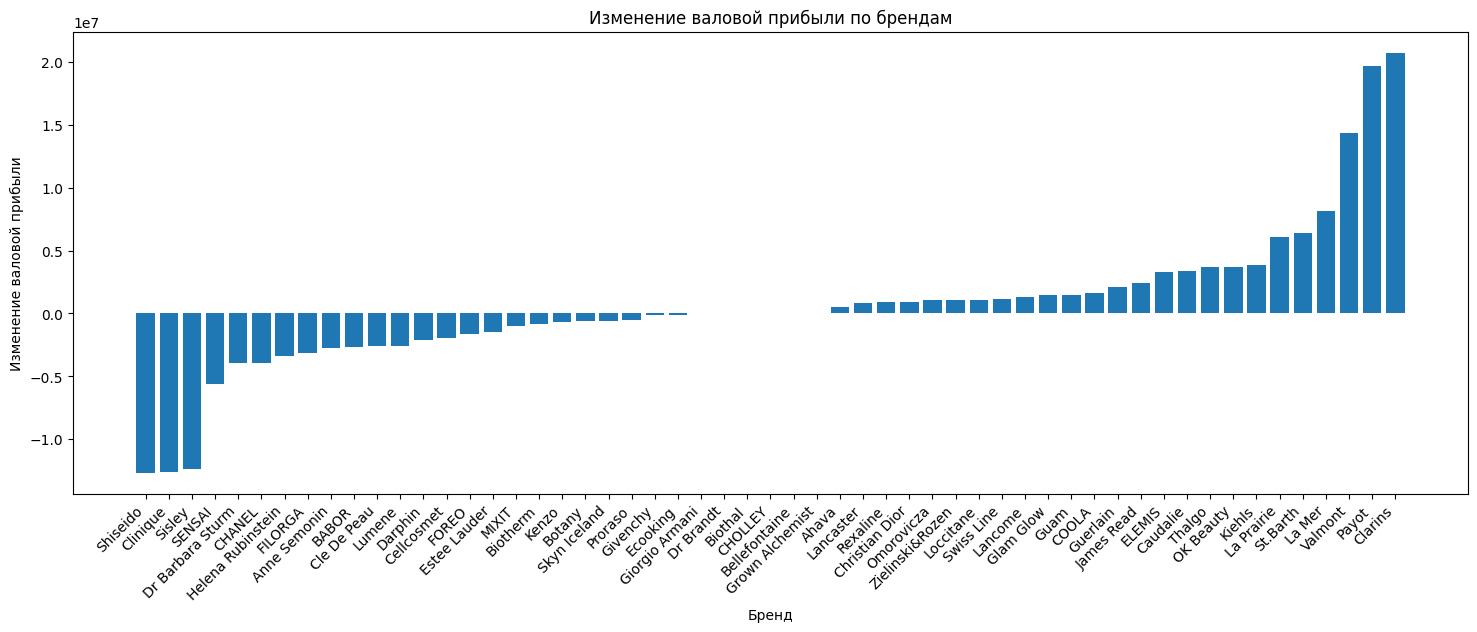

In [47]:
plt.figure(figsize=(18, 6))
plt.bar(brand_effect["brand_ax_1"], brand_effect["gp_change_abs"])
plt.xticks(rotation=45, ha="right")
plt.title("Изменение валовой прибыли по брендам")
plt.ylabel("Изменение валовой прибыли")
plt.xlabel("Бренд")
#plt.tight_layout()
plt.show()

#### Быстрый реультат

In [54]:
df_quick_win

,brand_ax_1,revenue_change_abs,gp_change_abs,avg_margin
43,Payot,38.48,"19,668,556.84",0.21
19,ELEMIS,11.98,"3,306,528.98",0.23
31,James Read,23.55,"2,418,870.00",0.23
9,COOLA,36.66,"1,630,777.04",0.21
54,Zielinski&Rozen,1.38,"1,076,593.02",0.21


#### Вывод

1. Выручка<br>
Совокупная выручка в 15-й неделе снизилась относительно 14-й, что подтверждается агрегатом revenue_total.<br>
Падение сформировано ограниченным числом брендов с наибольшей долей оборота, чей отрицательный вклад в gp_delta превышает положительный вклад растущих брендов.<br>
Это указывает на концентрацию риска в топ-портфеле.

3. Маржинальность<br>
Средневзвешенная маржинальность продаж изменилась незначительно (показатель margin_change_pp близок к нулю). Это означает, что:

- рост маржи у части брендов был компенсирован снижением у других;

- ключевым фактором стала не цена, а структура продаж.

3. Причины изменений<br>

- снижение выручки у брендов с высокой долей в обороте оказало решающее влияние на валовую прибыль.

- у брендов с отрицательным gp_delta при стабильной выручке наблюдается падение margin_p.

- рост нишевых брендов: бренды с высокой маржой растут, но пока не имеют достаточного веса.

4. Что даёт быстрый результат<br>
На основе таблицы df_quick_win:

- фокус на брендах с маржинальностью ≥20% и положительным вкладом в валовую прибыль

- перераспределение экспозиции и трафика в их пользу

- ограничение глубины скидок у брендов с отрицательным gp_delta

Вывод:
Быстрое улучшение маржинальности достигается не за счёт общего повышения цен, а за счёт управляемого изменения микса продаж и сокращения промо-давления у брендов, формирующих основную валовую прибыль.